<a href="https://colab.research.google.com/github/renzotap/Pytorch-Tutorial/blob/main/2SimpleNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F


In [2]:
#Create a Model Class that inherits nn.Module
class Model(nn.Module):
  #Input layer (4 features of the flower)-->
  #Hidden layer1 (number of neurons) -->
  #H2(n) -->
  #Output (3 classes of flowers)
  def __init__(self,in_features=4, h1=8,h2=9,out_features=3):
    super().__init__()
    self.fc1 =nn.Linear(in_features,h1)
    self.fc2 =nn.Linear(h1,h2)
    self.out=nn.Linear(h2,out_features)

  def forward(self, x):
    x= F.relu(self.fc1(x))
    x= F.relu(self.fc2(x))
    x= self.out(x)

    return x

In [3]:
# PIck a manual seed for randomization
torch.manual_seed(32)
#Create an instance of a model
model = Model()

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [5]:
url='https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'
my_df = pd.read_csv(url)


In [6]:
my_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [7]:
#Change last column 'species' strings to numbers
my_df['species']=my_df['species'].replace('setosa',0.0)
my_df['species']=my_df['species'].replace('versicolor',1.0)
my_df['species']=my_df['species'].replace('virginica',2.0)

/tmp/ipython-input-7-2210460620.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  my_df['species']=my_df['species'].replace('virginica',2.0)


In [8]:
# Train test split! Set X and Y
X = my_df.drop('species',axis=1)
y = my_df['species']

In [9]:
#Convert these to numpy arrays
X = X.values
y = y.values

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
#Train test split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=32)

In [12]:
#Convert X deatures to float tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

In [13]:
#Convert y labels to tensors long
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [14]:
#Set Criterion of model to measure the error, how far off the preidctions are from
criterion = nn. CrossEntropyLoss()
#Choose Adam optimizer, learning rate=lr (if error doesn't go down after a bunch of interations (epochs), lower lr)
optimizer = torch.optim.Adam(model.parameters(),lr=0.01)


In [15]:
model.parameters

<bound method Module.parameters of Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)>

In [16]:
#Train our model!
#Epochs? (one run through all the training data in our network)
epochs=100
losses = []
for i in range(epochs):
  #Go forward and get a prediction
  y_pred = model.forward(X_train) #Get predicted results

  #Measure a loss/error, gonna be high at first
  loss= criterion(y_pred, y_train) #predicted values vd the y_train

  #keep track of our losses
  losses.append(loss.detach().numpy())

  #Print every 10 epoch
  if i % 10 == 0:
    print(f'Epoch:{i} and loss: {loss}')
    #Do some back propagation: take error rate of forward propagation and feed it back to the network to fine tune the weights

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()


Epoch:0 and loss: 1.169895887374878
Epoch:10 and loss: 0.9578844308853149
Epoch:20 and loss: 0.7988812923431396
Epoch:30 and loss: 0.634953498840332
Epoch:40 and loss: 0.44043001532554626
Epoch:50 and loss: 0.29171693325042725
Epoch:60 and loss: 0.17829042673110962
Epoch:70 and loss: 0.11587585508823395
Epoch:80 and loss: 0.08928148448467255
Epoch:90 and loss: 0.07743765413761139


Text(0.5, 0, 'Epoch')

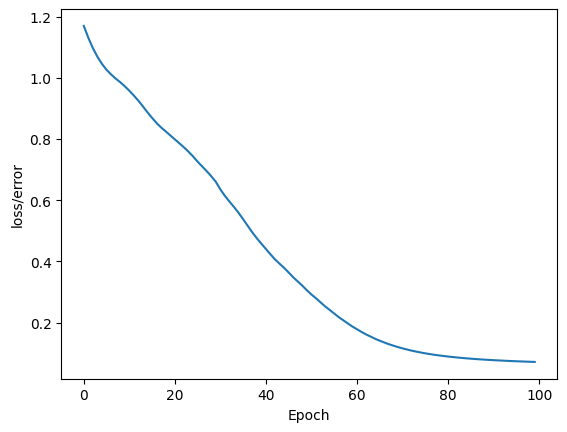

In [17]:
#Graph it out!
plt.plot(range(epochs),losses)
plt.ylabel("loss/error")
plt.xlabel("Epoch")

In [18]:
#Evauate Model on Test Data Set (validate model on test set )
with torch.no_grad(): #Basically tturn off back prpagation
  y_eval = model.forward(X_test) #X_test are features from our test set, y_eval will be predictions
  loss= criterion(y_eval,y_test) #find loss

In [19]:
loss

tensor(0.0539)

In [20]:
correct = 0
with torch.no_grad():
  for i, data in enumerate(X_test):
    y_val = model.forward(data)

    if y_test[i] == 0:
      x='Setosa'
    elif y_test[i] == 1:
      x='Versicolor'
    else:
      x='Virginica'

    #Will tell us what type of flower class our network thinks it is
    print(f'{i+1}) {str(y_val)}  \t {y_test[i]} = {x}\t {y_val.argmax().item()}')

    #Correct or not
    if y_val.argmax().item() == y_test[i]:
      correct += 1

print(f'We got {correct} correct')



1) tensor([-3.3580,  3.9452,  0.3616])  	 1 = Versicolor	 1
2) tensor([  7.5862,   1.1113, -11.3861])  	 0 = Setosa	 0
3) tensor([  6.6288,   1.5092, -10.4603])  	 0 = Setosa	 0
4) tensor([-3.3305,  4.2647,  0.0569])  	 1 = Versicolor	 1
5) tensor([-7.3705,  2.8135,  5.1481])  	 2 = Virginica	 2
6) tensor([-7.3749,  3.9061,  4.2781])  	 2 = Virginica	 2
7) tensor([  6.2304,   1.6527, -10.0543])  	 0 = Setosa	 0
8) tensor([  6.8783,   1.4056, -10.7016])  	 0 = Setosa	 0
9) tensor([-2.6728,  4.3138, -0.6444])  	 1 = Versicolor	 1
10) tensor([  7.2201,   1.3890, -11.1494])  	 0 = Setosa	 0
11) tensor([-3.8269,  4.4110,  0.5165])  	 1 = Versicolor	 1
12) tensor([-8.6886,  1.9990,  6.9012])  	 2 = Virginica	 2
13) tensor([-2.0605,  3.8275, -0.7672])  	 1 = Versicolor	 1
14) tensor([-1.0676,  4.3809, -2.2975])  	 1 = Versicolor	 1
15) tensor([-7.5000,  2.6230,  5.3318])  	 2 = Virginica	 2
16) tensor([-8.6214,  1.5491,  7.1280])  	 2 = Virginica	 2
17) tensor([-3.7724,  3.6503,  0.9422])  	 

In [21]:
new_iris = torch.tensor([4.7,3.2,1.3,0.2])

In [22]:
with torch.no_grad():
  print(model(new_iris))

tensor([  6.9155,   1.2532, -10.6096])


In [23]:
newer_iris = torch.tensor([5.9,3.0,5.1,1.8])

In [24]:
with torch.no_grad():
  print(model(newer_iris))

tensor([-6.7319,  2.6637,  4.5465])
